<h2><center>Importation des package</center></h2>
<center>(nombre des lucioles "nl", max bound "MB",
min bound "mb",nombre des variables "nv",..</center>

In [1]:
print("*************************************************** Importation des packages***************************************************")
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Activation, Conv2D, MaxPooling2D, Dropout
import numpy
from keras.preprocessing import image
from PIL import Image
import numpy as np
import sys
import os
import csv
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims
from tensorflow.python.eager.function import Function
import numpy as np
import math
import operator
import time as time
import psutil
import numpy
import matplotlib.pyplot as plt
print("* list des packages: ")
print("keras,numpy,PIL,SYS,OS,CSV,tensorflow,MATH,OPERATOR,TIME,PSUTIL,matplotlib")

*************************************************** Importation des packages***************************************************
* list des packages: 
keras,numpy,PIL,SYS,OS,CSV,tensorflow,MATH,OPERATOR,TIME,PSUTIL,matplotlib


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


<h2><center>initialisation des paramères</center></h2>
<center>nombre des lucioles , max bound ,min bound,nombre des variables ,..</center>

In [5]:
print("debut.......")

# #DEFINITION OF CNN PARAMETERS
batch_size = 5
kernel_size = (4,)
stride = 1
# #EPOCHS AND FILTERS ARE DEFINED BY PARTICLES
#
#DEFINITION OF firefly PARAMETERS
numberFirefly = 6
iterations = 4
#
minBound = numpy.ones(2)  # MIN BOUND FOR TWO DIMENSIONS IS 1
maxBound = numpy.ones(2)  # ONLY INITIALIZATION
maxBound[0] = 150  # MAX NUMBER OF FILTERS
maxBound[1] = 200  # MAX NUMBER OF EPOCHS
bounds = (minBound, maxBound)
print("bound:",bounds)
print("****************************************************************************************************************")

debut.......
bound: (array([1., 1.]), array([150., 200.]))
****************************************************************************************************************


<h3><center>generation des populations</center></h3>
<center><strong> 1/  génération des positions des lucioles </strong> <br>générer  des lucioles aléatoirement "nl" firefly chaque firefly contient "nv" variables compris entre "MB" et "mb" </center>

In [6]:
print("generation des populations")
from numpy.random import random_sample
def generate_population(population_size, problem_dim, min_bound, max_bound):
    error = 1e-10
    data = (max_bound + error - min_bound) * random_sample((population_size, problem_dim)) + min_bound
    #data[data > max_bound] = max_bound
    return data

fireflies=generate_population(numberFirefly, 2, minBound, maxBound)
fireflies = fireflies.astype(int)
print("population :")
print(fireflies)
print("*******************************************************************************************************************")

generation des populations
population :
[[  7  10]
 [ 31 108]
 [122   4]
 [114 124]
 [ 71 136]
 [131 162]]
*******************************************************************************************************************


# DATA

In [3]:
export_dataframe_1 = pd.read_excel('export_dataframe.xlsx')

In [4]:
export_dataframe=export_dataframe_1
export_dataframe=export_dataframe.groupby(pd.Grouper(key='Date Opération', axis=0, freq='D')).sum()
export_dataframe.head(3)

,Dossier,Poids Taxable,Catégorie,Prévision,Réalisation,N° Achat,prev_resultat
Date Opération,,,,,,,
2017-01-02,1.862371e+10,720389.00,3367,10936.146190,10866.671905,2057463002,69.474286
2017-01-03,1.288171e+10,507856.00,1781,10097.422857,10090.737143,1259284920,6.685714
2017-01-04,2.608677e+10,1267171.63,4703,17320.157619,17306.176667,2839801236,13.980952


In [5]:
export_dataframe=export_dataframe.drop(columns=['Dossier', 'Poids Taxable','Catégorie','Prévision','N° Achat','prev_resultat'])

In [6]:
num_prediction=400
split_date = '2020-12-31'

df_training = export_dataframe.loc[export_dataframe.index <= split_date]
df_test = export_dataframe.loc[export_dataframe.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

1460 days of training data 
 448 days of testing data 


In [7]:
num_prediction=400

In [27]:
df_future = pd.DataFrame(columns=['Date'])
df_future['Date'] = pd.date_range(start=export_dataframe.index.values[-1] +pd.Timedelta(days=1), periods=num_prediction)

In [28]:
df_future['Date']= pd.to_datetime(df_future['Date'])
df_future['hour'] = df_future['Date'].dt.hour
df_future['dayofweek'] = df_future['Date'].dt.dayofweek
df_future['quarter'] = df_future['Date'].dt.quarter
df_future['month'] = df_future['Date'].dt.month
df_future['year'] = df_future['Date'].dt.year
df_future['dayofyear'] = df_future['Date'].dt.dayofyear
df_future['sin_day'] = np.sin(df_future['dayofyear'])
df_future['cos_day'] = np.cos(df_future['dayofyear'])
df_future['dayofmonth'] = df_future['Date'].dt.day
df_future['weekofyear'] = df_future['Date'].dt.weekofyear
df_future = df_future.drop(['Date'], axis=1)

In [30]:
df_past_train = pd.DataFrame(columns=['Date'])
df_past_train['Date']= pd.to_datetime(export_dataframe.index)
df_past_train['hour'] = df_past_train['Date'].dt.hour
df_past_train['dayofweek'] = df_past_train['Date'].dt.dayofweek
df_past_train['quarter'] = df_past_train['Date'].dt.quarter
df_past_train['month'] = df_past_train['Date'].dt.month
df_past_train['year'] = df_past_train['Date'].dt.year
df_past_train['dayofyear'] = df_past_train['Date'].dt.dayofyear
df_past_train['sin_day'] = np.sin(df_past_train['dayofyear'])
df_past_train['cos_day'] = np.cos(df_past_train['dayofyear'])
df_past_train['dayofmonth'] = df_past_train['Date'].dt.day
df_past_train['weekofyear'] = df_past_train['Date'].dt.weekofyear
df_past_train = df_past_train.drop(['Date'], axis=1)

In [32]:
#result = pd.concat(frames)
df_future = np.concatenate((df_past_train,df_future))
df_future.shape

(2308, 10)

In [12]:
df_past = export_dataframe[['Réalisation']].reset_index()
df_past.rename(columns={'index': 'Date Opération', 'Réalisation':'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(export_dataframe.index)
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

In [13]:
# ADD time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X
    

from sklearn.preprocessing import StandardScaler
X_train_df, y_train = create_time_features(export_dataframe, target='Réalisation')
X_test_df, y_test = create_time_features(df_test, target='Réalisation')
scaler = StandardScaler()
scaler.fit(X_train_df)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [14]:
# For our dl model we will create windows of data that will be feeded into the datasets, for each timestemp T we will append the data from T-7 to T to the Xdata with target Y(t)
BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24


def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarante all samples have the window, so new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)

In [15]:
# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_test)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()


Test set equal: True


<center><strong> 2/ genétarion des luminisotés des firefly</strong>  <br> initialiser la luminosité 'I' des chaque firefly généré par le taux de perte de modèle basé sur les paramètre de cette firefly</strong></center> 

In [13]:
print('*******************************************declaration de cnn_covid19**********************************************')
print("cette fonction va entrainer le modèle crée par les nombre des epochs et filters de chaque firefly et retourner le taux"
      "de perte de cette modèle après le test de cette modèle sur un ensemble de test")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from math import sqrt

def Lstm_optm(epochs, filters,save=False):
    dropout = 0.0
    simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
    ])

    simple_lstm_model.compile(optimizer='rmsprop', loss='mse')
    simple_lstm_model.summary()
    
    EVALUATION_INTERVAL = 200
    EPOCHS = epochs
    model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=filters)  # ,callbacks=[tensorboard_callback]) #Uncomment this line for tensorboard support
    

    yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]
    rmse=sqrt(mean_squared_error(y_test, yhat)) 

    return rmse
    

*******************************************declaration de cnn_covid19**********************************************
cette fonction va entrainer le modèle crée par les nombre des epochs et filters de chaque firefly et retourner le tauxde perte de cette modèle après le test de cette modèle sur un ensemble de test


In [14]:
print("******************************************déclaration de optimize CNN****************************************************")
print("cette fonction va avoir une luciole contenant le nombre des epochs et des filters généré après on va calculer l'accuracy"
      "de modèle basé sur cette nombre des epochs et filters (en passant ces paramètre a la fonction CNN_COVID) et finalement on va calculer" 
      "le taux de perte en se basant sur l'accuracy et nombre de filter et des epochs")
def LossCNN(firefly):
    try:
        
        print(firefly)
        #RETRIEVE DIMENSIONS OF PARTICLE
        numberFilters = int(firefly[0]) #FLOAT TO INT
        numberEpochs = int(firefly[1])

        #CALL CNN FUNCTION cnn --> RETURN accuracy
        rmse = Lstm_optm(epochs=numberEpochs, filters=numberFilters)

        #APPLY LOST FUNCTION --> THE MAIN OBJECTIVE IS TO MINIMIZE LOSS --> MAXIMIZE ACCURACY AND AT SAME TIME MINIMIZE THE NUMBER OF EPOCHS
                                #AND FILTERS, TO REDUCE TIME AND COMPUTACIONAL POWER
        
        return rmse

    except:
        raise

******************************************déclaration de optimize CNN****************************************************
cette fonction va avoir une luciole contenant le nombre des epochs et des filters généré après on va calculer l'accuracyde modèle basé sur cette nombre des epochs et filters (en passant ces paramètre a la fonction CNN_COVID) et finalement on va calculerle taux de perte en se basant sur l'accuracy et nombre de filter et des epochs


In [15]:
print("****************************************déclaration au Firefly-Iteration***********************************************")
print("cette fonction va boucler sur le nombre des lucioles générer et pour chaque itération on va faire appel "
      "a la fonction LossCNN qui va retourne le taux de perte de modèle de firefly passé en paramètre")
def FireflyIteration(fireflies):
    try:
        numberFirefly = fireflies.shape[0]
        allLosses = [LossCNN(firefly=fireflies[i])for i in range(numberFirefly)]


        return allLosses#NEED TO RETURN THIS PYSWARMS NEED THIS

    except:
        raise

****************************************déclaration au Firefly-Iteration***********************************************
cette fonction va boucler sur le nombre des lucioles générer et pour chaque itération on va faire appel a la fonction LossCNN qui va retourne le taux de perte de modèle de firefly passé en paramètre


In [16]:
print("initialisation...............")
allLosses=np.array([])
allLosses=FireflyIteration(fireflies)


initialisation...............
[100  87]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               71168     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 104,321
Trainable params: 104,321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/87
200/200 [==============================] - 5s 26ms/step - loss: 6277417984.0000 - val_loss: 7868178944.0000
Epoch 2/87
200/200 [==============================] - 4s 22ms/step - loss: 3726717696.000

200/200 [==============================] - 5s 24ms/step - loss: 241604480.0000 - val_loss: 454712544.0000
Epoch 37/56
200/200 [==============================] - 4s 22ms/step - loss: 215459504.0000 - val_loss: 573194688.0000
Epoch 38/56
200/200 [==============================] - 4s 22ms/step - loss: 206166496.0000 - val_loss: 410778272.0000
Epoch 39/56
200/200 [==============================] - 4s 21ms/step - loss: 208098160.0000 - val_loss: 594985600.0000
Epoch 40/56
200/200 [==============================] - 4s 21ms/step - loss: 168769296.0000 - val_loss: 357020992.0000
Epoch 41/56
200/200 [==============================] - 4s 21ms/step - loss: 158241024.0000 - val_loss: 395660832.0000
Epoch 42/56
200/200 [==============================] - 4s 22ms/step - loss: 156701680.0000 - val_loss: 357038912.0000
Epoch 43/56
200/200 [==============================] - 4s 21ms/step - loss: 128893416.0000 - val_loss: 325069056.0000
Epoch 44/56
200/200 [==============================] - 4s 21ms/step 

200/200 [==============================] - 5s 25ms/step - loss: 9736776.0000 - val_loss: 209023504.0000
Epoch 111/151
200/200 [==============================] - 5s 24ms/step - loss: 9314737.0000 - val_loss: 218355024.0000
Epoch 112/151
200/200 [==============================] - 5s 24ms/step - loss: 9491167.0000 - val_loss: 229430064.0000
Epoch 113/151
200/200 [==============================] - 5s 25ms/step - loss: 9058055.0000 - val_loss: 234791776.0000
Epoch 114/151
200/200 [==============================] - 5s 25ms/step - loss: 9611540.0000 - val_loss: 209945200.0000
Epoch 115/151
200/200 [==============================] - 5s 25ms/step - loss: 8756802.0000 - val_loss: 216968096.0000
Epoch 116/151
200/200 [==============================] - 5s 24ms/step - loss: 8152060.5000 - val_loss: 200048432.0000
Epoch 117/151
200/200 [==============================] - 6s 28ms/step - loss: 8606457.0000 - val_loss: 207214256.0000
Epoch 118/151
200/200 [==============================] - 5s 25ms/step 

200/200 [==============================] - 7s 36ms/step - loss: 1490750080.0000 - val_loss: 4131211008.0000
Epoch 8/197
200/200 [==============================] - 6s 29ms/step - loss: 1522269440.0000 - val_loss: 3392378624.0000
Epoch 9/197
200/200 [==============================] - 6s 32ms/step - loss: 1491581696.0000 - val_loss: 3465602048.0000
Epoch 10/197
200/200 [==============================] - 6s 31ms/step - loss: 1395003904.0000 - val_loss: 3690039296.0000
Epoch 11/197
200/200 [==============================] - 7s 34ms/step - loss: 1487590656.0000 - val_loss: 3044441344.0000
Epoch 12/197
200/200 [==============================] - 7s 33ms/step - loss: 1469428736.0000 - val_loss: 2940273408.0000
Epoch 13/197
200/200 [==============================] - 7s 33ms/step - loss: 1312155648.0000 - val_loss: 3867037184.0000
Epoch 14/197
200/200 [==============================] - 7s 33ms/step - loss: 1747756800.0000 - val_loss: 4727250944.0000
Epoch 15/197
200/200 [=========================

200/200 [==============================] - 9s 47ms/step - loss: 18807782.0000 - val_loss: 163249680.0000
Epoch 145/197
200/200 [==============================] - 9s 43ms/step - loss: 27063130.0000 - val_loss: 200761792.0000
Epoch 146/197
200/200 [==============================] - 11s 53ms/step - loss: 30400226.0000 - val_loss: 222581248.0000
Epoch 147/197
200/200 [==============================] - 9s 45ms/step - loss: 20291348.0000 - val_loss: 297981152.0000
Epoch 148/197
200/200 [==============================] - 8s 42ms/step - loss: 25857694.0000 - val_loss: 432214304.0000
Epoch 149/197
200/200 [==============================] - 9s 47ms/step - loss: 70406576.0000 - val_loss: 411521376.0000
Epoch 150/197
200/200 [==============================] - 9s 46ms/step - loss: 33817904.0000 - val_loss: 244074912.0000
Epoch 151/197
200/200 [==============================] - 9s 43ms/step - loss: 23737918.0000 - val_loss: 285045152.0000
Epoch 152/197
200/200 [==============================] - 8s 4

200/200 [==============================] - 9s 43ms/step - loss: 13322172.0000 - val_loss: 242338880.0000
Epoch 91/179
200/200 [==============================] - 8s 39ms/step - loss: 13881872.0000 - val_loss: 232740528.0000
Epoch 92/179
200/200 [==============================] - 8s 40ms/step - loss: 10569611.0000 - val_loss: 254803648.0000
Epoch 104/179
200/200 [==============================] - 8s 40ms/step - loss: 9782685.0000 - val_loss: 252868640.0000
Epoch 105/179
200/200 [==============================] - 7s 36ms/step - loss: 11903270.0000 - val_loss: 224485824.0000
Epoch 106/179
200/200 [==============================] - 7s 37ms/step - loss: 9808322.0000 - val_loss: 248725136.0000
Epoch 107/179
200/200 [==============================] - 7s 36ms/step - loss: 10442037.0000 - val_loss: 245513184.0000
Epoch 108/179
200/200 [==============================] - 7s 37ms/step - loss: 9552739.0000 - val_loss: 238220608.0000
Epoch 109/179
200/200 [==============================] - 7s 35ms/st

In [17]:
print("fin de initialisation des paramère")

fin de initialisation des paramère


In [18]:
print("************************************  voila les paramètre (loss) des firefly a initialisé**********************")
print(allLosses)
for i in range(numberFirefly):
    print("firefly [ epochs = ",fireflies[i][1],", filter = " ,fireflies[i][0], "] ==> Loss (lumunisoté :)",allLosses[i]) 

************************************  voila les paramètre (loss) des firefly a initialisé**********************
[13355.141774697684, 15431.208063902148, 13652.16105873259, 13183.51447709143, 16364.945298871588, 15048.068036383433]
firefly [ epochs =  87 , filter =  100 ] ==> Loss (lumunisoté :) 13355.141774697684
firefly [ epochs =  56 , filter =  32 ] ==> Loss (lumunisoté :) 15431.208063902148
firefly [ epochs =  151 , filter =  39 ] ==> Loss (lumunisoté :) 13652.16105873259
firefly [ epochs =  75 , filter =  143 ] ==> Loss (lumunisoté :) 13183.51447709143
firefly [ epochs =  197 , filter =  95 ] ==> Loss (lumunisoté :) 16364.945298871588
firefly [ epochs =  179 , filter =  18 ] ==> Loss (lumunisoté :) 15048.068036383433


<h3><center>le lancement de l'optimisation A l'aide de l'algorithme Firefly</center></h3>

from IPython.display import Image
Image("DPL3.png",width=1000)

In [19]:
print("********* class Firefly ********")

class Firefly:

    def __init__(self, position,brightness,function):
        self.func = function                         # Choose the benchmark algorithm to run
        self.position = position
        self.brightness = brightness
        #self.update_brightness()

    # the best fit is 0
    def update_brightness(self):
        self.brightness = -self.func(self.position)

********* class Firefly ********


In [20]:
class FireflyOptimizer:

    def __init__(self, obj, **kwargs):
        self.population_size = int(kwargs.get('population_size', 4))
        self.problem_dim = kwargs.get('problem_dim', 2)
        self.min_bound = kwargs.get('min_bound', 1)
        self.max_bound = kwargs.get('max_bound', 30)
        self.generations = kwargs.get('generations', 2)
        self.population = self._population(self.population_size, self.problem_dim, self.min_bound, self.max_bound)
        self.gamma = kwargs.get('gamma', 0.95)  # absorption coefficient
        self.alpha = kwargs.get('alpha', 0.25)  # randomness [0,1]
        self.beta_init = kwargs.get('beta_init', 1)
        self.beta_min = kwargs.get('beta_min', 0.2)
        self.optimization_benchmark = obj
        self.dtime = 0

    @staticmethod
    def _population(population_size, problem_dim, min_bound, max_bound):
        population = []
        for i in range(population_size):
            population.append(Firefly(problem_dim, min_bound, max_bound))
        return population

    def step(self):
        self.population.sort(key=operator.attrgetter('brightness'), reverse=True)
        self._modify_alpha()
        tmp_population = self.population
        for i in range(self.population_size):
            for j in range(self.population_size):
                if self.population[i].brightness > tmp_population[j].brightness:
                    r = math.sqrt(np.sum((self.population[i].position - tmp_population[j].position) ** 2))
                    beta = (self.beta_init - self.beta_min) * math.exp(-self.gamma * r ** 2) + self.beta_min
                    tmp = self.alpha * (np.random.random_sample((1, self.problem_dim))[0] - 0.5) * (
                            self.max_bound - self.min_bound)
                    self.population[j].position = self.check_position(
                        self.population[i].position * (1 - beta) + tmp_population[
                            j].position * beta + tmp)
                    self.population[j].update_brightness()

        # Changing the position of Brightness so the population will shift to other locations

        # self.population[0].position = generate_population(1, self.problem_dim, self.min_bound, self.max_bound)[0]
        # self.population[0].update_brightness()

    # Best placement for each Generation
    def run_firefly(self, population):
        self.population = population
        start = time.time()

        self.res = {}
        for t in range(self.generations):
            self.res[t] = ('Generation %s, best fitness %s' % (t, self.population[0].brightness))
            self.step()
        end = time.time()
        self.dtime = end - start
        self.dtime = float(str(end - start)[:4])
        # """ psg.popup_scrolled('FA Results\n',
        #                  self.res,
        #                 '\nAlgorithm run time: ', self.dtime,
        #                '\nAverage CPU usage: ', psutil.cpu_percent(), size=[50, 30])"""

        self.population.sort(key=operator.attrgetter('brightness'), reverse=True)
        return self.population[0].brightness, self.population[0].position
    def check_position(self, position):
        position[position > self.max_bound] = self.max_bound
        position[position < self.min_bound] = self.min_bound
        return position

    def _modify_alpha(self):
        delta = 1 - (10 ** (-4) / 0.9) ** (1 / self.generations)
        self.alpha = (1 - delta) * self.alpha

In [26]:
def Lstm_firefly(firefly):
    print("la fonction objective de l'algorithme de firefly va avoir une luciole en paramère et"
          "retourne le taux de perte de modèle basé sur les paramètre de cette luciole")
    epochs=int(firefly[1])
    filters=int(firefly[0])
    #x_test,y_test=generate_x_test()
    print("nbr epoch",epochs)
    print("nbr filter",filters)
    dropout = 0.0
    simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
    ])

    simple_lstm_model.compile(optimizer='rmsprop', loss='mse')
    simple_lstm_model.summary()
    
    EVALUATION_INTERVAL = 200
    EPOCHS = epochs
    model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=filters)  # ,callbacks=[tensorboard_callback]) #Uncomment this line for tensorboard support
    

    yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]
    rmse=sqrt(mean_squared_error(y_test, yhat)) 
    return rmse


In [27]:
print("creation des firefly....;")
population = [Firefly(fireflies[i],allLosses[i],Lstm_firefly)for i in range(len(fireflies))]

creation des firefly....;


In [28]:
population[0]

In [29]:
print("lancement algorithme de firefly..........")
print("l'algorithme peut prendre un peu de temps merci de patienter")
optimizer=FireflyOptimizer(Lstm_firefly)
brightness,position = optimizer.run_firefly(population)

lancement algorithme de firefly..........
l'algorithme peut prendre un peu de temps merci de patienter
la fonction objective de l'algorithme de firefly va avoir une luciole en paramère etretourne le taux de perte de modèle basé sur les paramètre de cette luciole
nbr epoch 30
nbr filter 30
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 128)               71168     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 104,321
Trainable params: 104,321
Non-trainable params: 0
______________________

200/200 [==============================] - 5s 26ms/step - loss: 1337300224.0000 - val_loss: 3631806720.0000
Epoch 11/29
200/200 [==============================] - 5s 27ms/step - loss: 1384601344.0000 - val_loss: 2872779776.0000
Epoch 12/29
200/200 [==============================] - 6s 31ms/step - loss: 1336590848.0000 - val_loss: 2681134592.0000
Epoch 13/29
200/200 [==============================] - 5s 27ms/step - loss: 1192013952.0000 - val_loss: 3016747520.0000
Epoch 14/29
200/200 [==============================] - 5s 27ms/step - loss: 1232536576.0000 - val_loss: 2436652544.0000
Epoch 15/29
200/200 [==============================] - 5s 27ms/step - loss: 1168363008.0000 - val_loss: 2626271232.0000
Epoch 16/29
200/200 [==============================] - 6s 28ms/step - loss: 1057810816.0000 - val_loss: 2695575040.0000
Epoch 17/29
200/200 [==============================] - 5s 27ms/step - loss: 1079066240.0000 - val_loss: 2377275392.0000
Epoch 18/29
200/200 [==============================]

Epoch 2/29
200/200 [==============================] - 6s 31ms/step - loss: 3742669056.0000 - val_loss: 6547817984.0000
Epoch 3/29
200/200 [==============================] - 6s 30ms/step - loss: 3675642880.0000 - val_loss: 6453143040.0000
Epoch 4/29
200/200 [==============================] - 6s 30ms/step - loss: 2444171264.0000 - val_loss: 3954710272.0000
Epoch 5/29
200/200 [==============================] - 6s 30ms/step - loss: 1674203136.0000 - val_loss: 3535094528.0000
Epoch 6/29
200/200 [==============================] - 6s 31ms/step - loss: 1597863936.0000 - val_loss: 3176933888.0000
Epoch 7/29
200/200 [==============================] - 7s 33ms/step - loss: 1443334528.0000 - val_loss: 3624891648.0000
Epoch 8/29
200/200 [==============================] - 6s 31ms/step - loss: 1490439168.0000 - val_loss: 2935409920.0000
Epoch 9/29
200/200 [==============================] - 7s 33ms/step - loss: 1468841088.0000 - val_loss: 2922729728.0000
Epoch 10/29
200/200 [===========================

200/200 [==============================] - 6s 32ms/step - loss: 6247529984.0000 - val_loss: 7836223488.0000
Epoch 2/30
200/200 [==============================] - 6s 29ms/step - loss: 3756657408.0000 - val_loss: 6601800704.0000
Epoch 3/30
200/200 [==============================] - 6s 32ms/step - loss: 3599382016.0000 - val_loss: 6158990848.0000
Epoch 4/30
200/200 [==============================] - 7s 34ms/step - loss: 2128174848.0000 - val_loss: 4370985984.0000
Epoch 5/30
200/200 [==============================] - 7s 35ms/step - loss: 1593218304.0000 - val_loss: 3478465024.0000
Epoch 6/30
200/200 [==============================] - 7s 33ms/step - loss: 1532649472.0000 - val_loss: 3129196288.0000
Epoch 7/30
200/200 [==============================] - 6s 31ms/step - loss: 1421270784.0000 - val_loss: 3721985024.0000
Epoch 8/30
200/200 [==============================] - 6s 30ms/step - loss: 1485371392.0000 - val_loss: 3141053696.0000
Epoch 9/30
200/200 [==============================] - 7s 33

Epoch 21/30
200/200 [==============================] - 9s 44ms/step - loss: 951273472.0000 - val_loss: 2103576192.0000
Epoch 22/30
200/200 [==============================] - 8s 41ms/step - loss: 846190144.0000 - val_loss: 1946781440.0000
Epoch 23/30
200/200 [==============================] - 9s 44ms/step - loss: 856367872.0000 - val_loss: 1596819328.0000
Epoch 24/30
200/200 [==============================] - 8s 40ms/step - loss: 774808192.0000 - val_loss: 1706558080.0000
Epoch 25/30
200/200 [==============================] - 9s 43ms/step - loss: 686174272.0000 - val_loss: 1300238080.0000
Epoch 26/30
200/200 [==============================] - 9s 44ms/step - loss: 676113024.0000 - val_loss: 1196036480.0000
Epoch 27/30
200/200 [==============================] - 9s 43ms/step - loss: 604146368.0000 - val_loss: 1089205888.0000
Epoch 28/30
200/200 [==============================] - 9s 43ms/step - loss: 525444000.0000 - val_loss: 1044889408.0000
Epoch 29/30
200/200 [===========================

Epoch 12/29
200/200 [==============================] - 8s 39ms/step - loss: 1240480384.0000 - val_loss: 2356377344.0000
Epoch 13/29
200/200 [==============================] - 8s 38ms/step - loss: 1113633152.0000 - val_loss: 2943369216.0000
Epoch 14/29
200/200 [==============================] - 8s 40ms/step - loss: 1119017728.0000 - val_loss: 2006252288.0000
Epoch 15/29
200/200 [==============================] - 8s 39ms/step - loss: 1094667520.0000 - val_loss: 2055026816.0000
Epoch 16/29
200/200 [==============================] - 8s 39ms/step - loss: 971945600.0000 - val_loss: 2633206784.0000
Epoch 17/29
200/200 [==============================] - 7s 37ms/step - loss: 1011124160.0000 - val_loss: 1955572608.0000
Epoch 18/29
200/200 [==============================] - 8s 39ms/step - loss: 902706112.0000 - val_loss: 1682050944.0000
Epoch 19/29
200/200 [==============================] - 8s 38ms/step - loss: 802931968.0000 - val_loss: 1678108544.0000
Epoch 20/29
200/200 [======================

Epoch 5/30
200/200 [==============================] - 7s 37ms/step - loss: 1626128128.0000 - val_loss: 3403752192.0000
Epoch 6/30
200/200 [==============================] - 6s 32ms/step - loss: 1580135168.0000 - val_loss: 3157929472.0000
Epoch 7/30
200/200 [==============================] - 8s 41ms/step - loss: 1439862912.0000 - val_loss: 4152886784.0000
Epoch 8/30
200/200 [==============================] - 7s 35ms/step - loss: 1494057856.0000 - val_loss: 3085552640.0000
Epoch 9/30
200/200 [==============================] - 7s 37ms/step - loss: 1460637568.0000 - val_loss: 2782203392.0000
Epoch 10/30
200/200 [==============================] - 7s 37ms/step - loss: 1343654656.0000 - val_loss: 3423837440.0000
Epoch 11/30
200/200 [==============================] - 7s 37ms/step - loss: 1407286400.0000 - val_loss: 2924964352.0000
Epoch 12/30
200/200 [==============================] - 7s 36ms/step - loss: 1336838144.0000 - val_loss: 2920317184.0000
Epoch 13/30
200/200 [========================

In [30]:
print("l'alghoritme a bien terminé et trouvé la bonne ruesultat")
print("**********************************best parametre :**********************************")
print(brightness,position)

l'alghoritme a bien terminé et trouvé la bonne ruesultat
**********************************best parametre :**********************************
16364.945298871588 [ 95 197]


In [24]:
def Lstm_firefly1(firefly):
    print("la fonction objective de l'algorithme de firefly va avoir une luciole en paramère et"
          "retourne le taux de perte de modèle basé sur les paramètre de cette luciole")
    epochs=int(firefly[1])
    filters=int(firefly[0])
    #x_test,y_test=generate_x_test()
    print("nbr epoch",epochs)
    print("nbr filter",filters)
    dropout = 0.0
    simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
    ])

    simple_lstm_model.compile(optimizer='rmsprop', loss='mse')
    simple_lstm_model.summary()
    
    EVALUATION_INTERVAL = 200
    EPOCHS = epochs
    model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=filters)  # ,callbacks=[tensorboard_callback]) #Uncomment this line for tensorboard support
    

    yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]
    rmse=sqrt(mean_squared_error(y_test, yhat)) 
    return simple_lstm_model,rmse


In [25]:
print("Fiiiiiiiiiiiiiiiiiiiiiiinnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn")
print("lancement d'entrainnement de modèle terminale  en utilisant les meilleur hyperparamètre")
print("..................")
print("on commmence..................")
model,rmse=Lstm_firefly1(position)

Fiiiiiiiiiiiiiiiiiiiiiiinnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
lancement d'entrainnement de modèle terminale  en utilisant les meilleur hyperparamètre
..................
on commmence..................
la fonction objective de l'algorithme de firefly va avoir une luciole en paramère etretourne le taux de perte de modèle basé sur les paramètre de cette luciole
nbr epoch 197
nbr filter 95
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               71168     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       


Epoch 59/197
200/200 [==============================] - 4s 22ms/step - loss: 43713068.0000 - val_loss: 230336864.0000
Epoch 60/197
200/200 [==============================] - 5s 25ms/step - loss: 38554300.0000 - val_loss: 205585328.0000
Epoch 61/197
200/200 [==============================] - 5s 23ms/step - loss: 37840592.0000 - val_loss: 175443680.0000
Epoch 62/197
200/200 [==============================] - 5s 23ms/step - loss: 37767652.0000 - val_loss: 202846144.0000
Epoch 63/197
200/200 [==============================] - 5s 24ms/step - loss: 33789760.0000 - val_loss: 189110464.0000
Epoch 64/197
200/200 [==============================] - 5s 25ms/step - loss: 34412588.0000 - val_loss: 138337280.0000
Epoch 65/197
200/200 [==============================] - 5s 23ms/step - loss: 33095194.0000 - val_loss: 192496736.0000
Epoch 66/197
200/200 [==============================] - 5s 24ms/step - loss: 31028376.0000 - val_loss: 138815872.0000
Epoch 67/197
200/200 [==============================] - 

200/200 [==============================] - 6s 28ms/step - loss: 3549650.0000 - val_loss: 137656752.0000


yhat = model.predict(X_test_w).reshape(1, -1)[0]
rmse=sqrt(mean_squared_error(y_test, yhat))
rmse

In [26]:
scaler.fit(df_future)  # No cheating, never scale on the training+test!
df_future = scaler.transform(df_future)
def window_data_test(X, window):
    '''
    The dataset length will be reduced to guarante all samples have the window, so new length will be len(dataset)-window
    '''
    x = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
    return np.array(x)
df_future_test=window_data_test(df_future,24)

In [27]:
def predict(num_prediction,model,lookback=0,pas=1):
    prediction_list = df_future_test[-(lookback+num_prediction):]
    look_forward=0
    future=[]
    for _ in range(num_prediction):
        x = prediction_list[look_forward:lookback+look_forward]
        out = model.predict(x)[0][0]
        future.append(out)
        look_forward=look_forward+pas
        #prediction_list = np.append(prediction_list, out)
    return future
        
future1=predict(num_prediction, model,100)

In [28]:
df_future_test = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future_test['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] +pd.Timedelta(days=1), periods=num_prediction)
df_future_test['Forecast'] = future1
df_future_test['Actual'] = np.nan

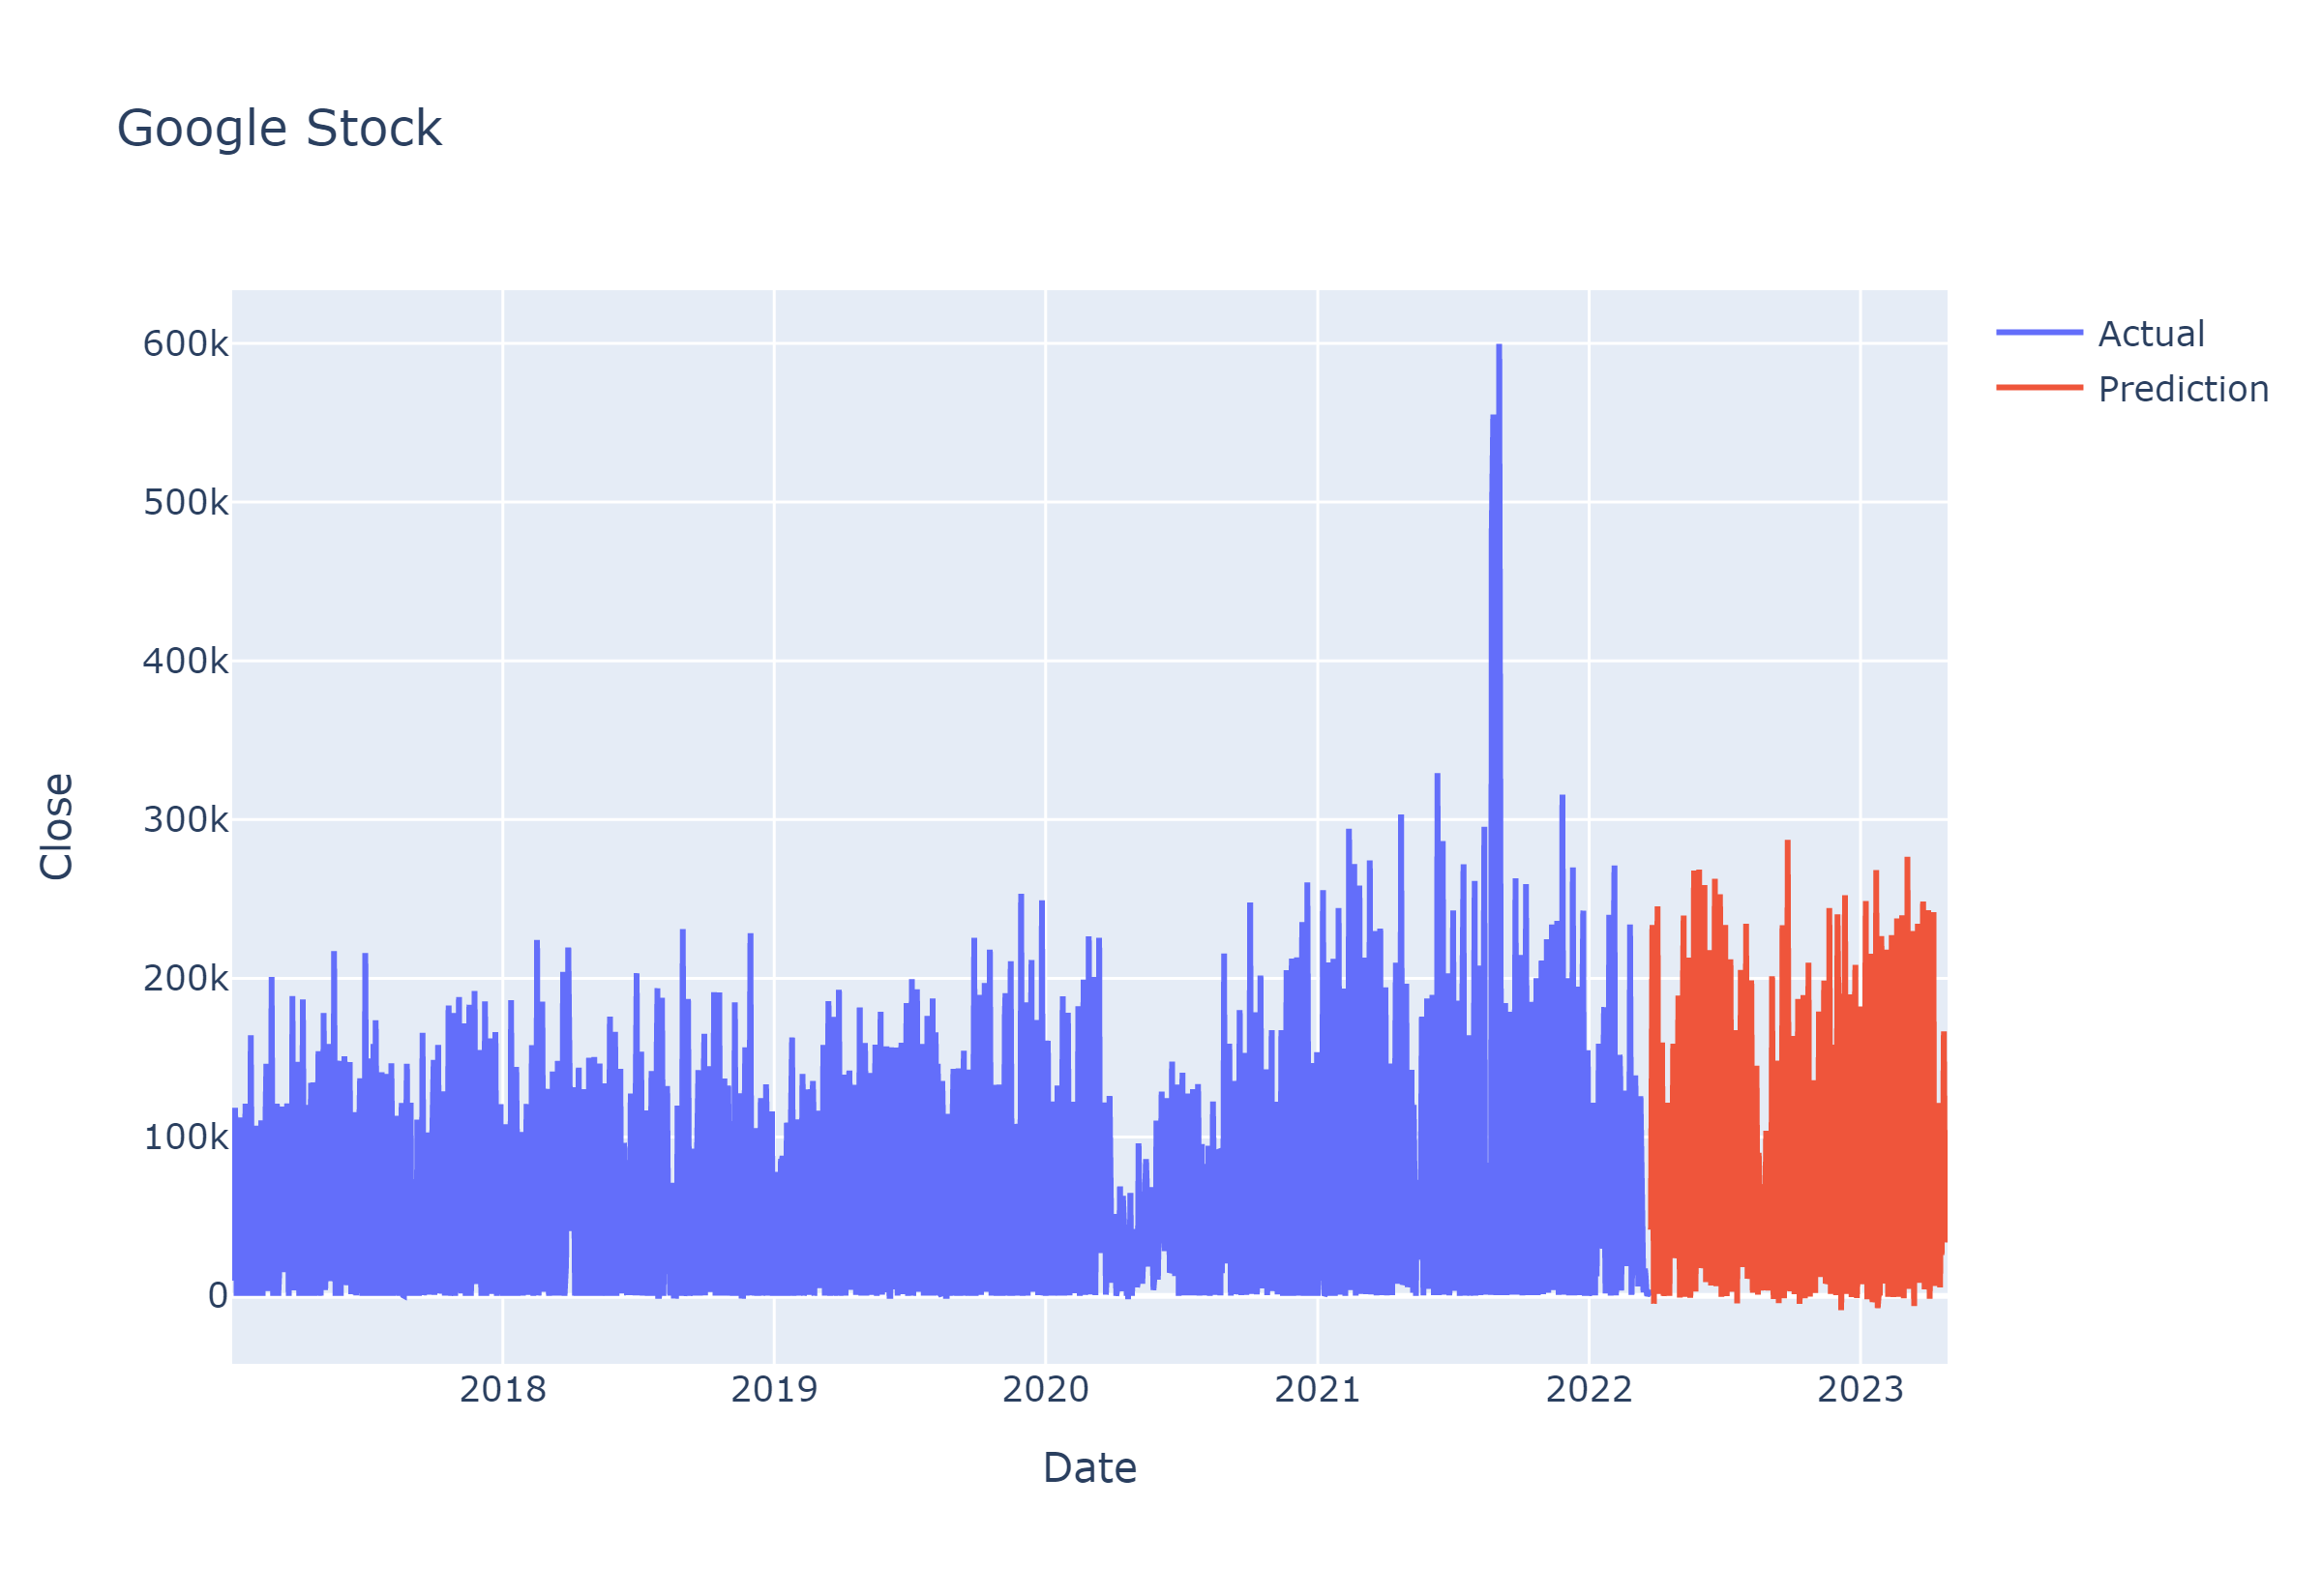

In [33]:
import plotly.graph_objs as go
from IPython.display import Image

trace1 = go.Scatter(
    y = df_past.Actual,
    x = df_past.Date,
    mode = 'lines',
    name = 'Actual'
)
trace2 = go.Scatter(
    y = df_future_test.Forecast,
    x = df_future_test.Date,
    mode = 'lines',
    name = 'Prediction'
)

layout = go.Layout(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()
img_bytes = fig.to_image(format="png", width=800, height=550, scale=3)
Image(img_bytes)